In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
prices = pd.DataFrame({'open': [25, 22, 21, 19, 23, 21, 25, 29],
                       'close': [24, 20, 17, 23, 22, 25, 29, 31],
                       'high': [28, 27, 29, 25, 24, 26, 31, 37],
                       'low': [22, 16, 14, 17, 19, 18, 22, 26]},
                       index=pd.date_range("2021-01-01", periods=8, freq="d"))

In [3]:
prices

,open,close,high,low
2021-01-01,25,24,28,22
2021-01-02,22,20,27,16
2021-01-03,21,17,29,14
2021-01-04,19,23,25,17
2021-01-05,23,22,24,19
2021-01-06,21,25,26,18
2021-01-07,25,29,31,22
2021-01-08,29,31,37,26


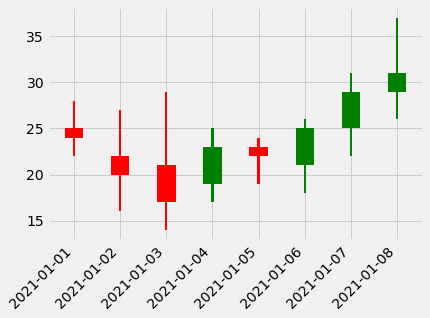

In [4]:
#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [5]:
#load the data
df= yf.Ticker('AAPL').history(start='2006-10-2',end='2011-10-30')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-10-02,2.290099,2.313580,2.265704,2.282780,712639200,0,0
2006-10-03,2.270279,2.285525,2.231856,2.258995,790708800,0,0
2006-10-04,2.259605,2.301076,2.230940,2.298637,829082800,0,0
2006-10-05,2.272718,2.322423,2.260520,2.281866,683883200,0,0
2006-10-06,2.269363,2.288270,2.250762,2.263264,466958800,0,0
...,...,...,...,...,...,...,...
2011-10-24,12.081111,12.395808,12.057326,12.373549,502138000,0,0
2011-10-25,12.350980,12.397332,12.117702,12.129594,430427200,0,0
2011-10-26,12.251269,12.275360,11.988716,12.215897,456304800,0,0


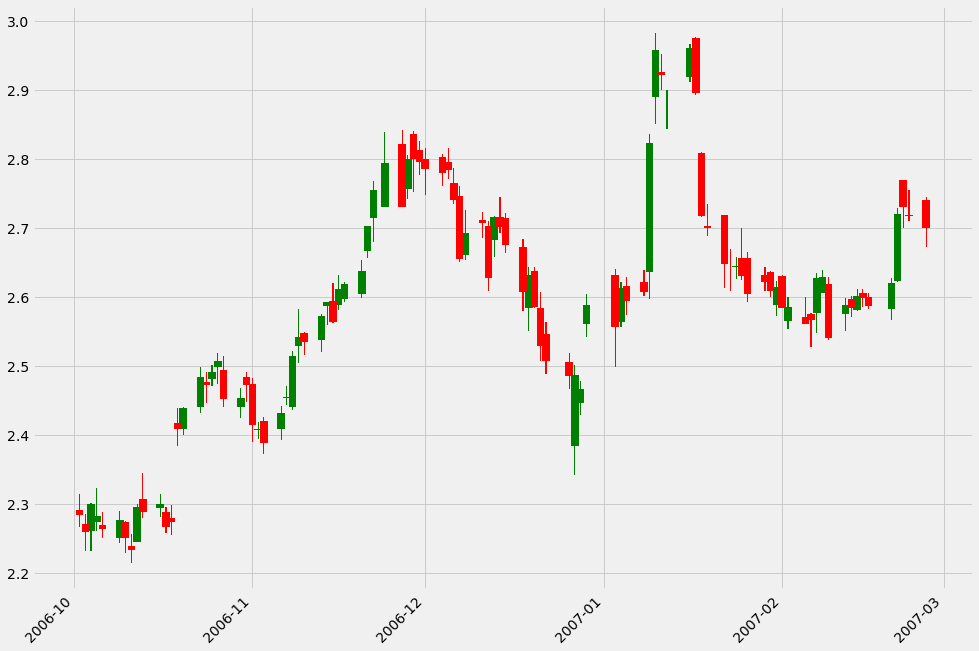

In [6]:
#create figure
plt.figure(figsize=(15,10))
df1=df[0:100]
#define width of candlestick elements
width = 1.3
width2 = 0.2

#define up and down prices
up = df1[df1.Close>=df1.Open]
down = df1[df1.Close<df1.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Close,width2,bottom=down.Close,color=col2)
plt.bar(down.index,down.Low-down.Open,width2,bottom=down.Open,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [7]:
#Create the simple Moving Average with a 30 day Window
SMA30=pd.DataFrame()
SMA30['Close Price']=df['Close'].rolling(window=30).mean()
SMA30

,Close Price
Date,
2006-10-02,NaN
2006-10-03,NaN
2006-10-04,NaN
2006-10-05,NaN
2006-10-06,NaN
...,...
2011-10-24,12.107225
2011-10-25,12.120591
2011-10-26,12.132077


In [8]:
#Create a simple moving average 
#Create a simple moving average 
df['SMA30']=df['Close'].rolling(window=30).mean()
df['SMA100']=df['Close'].rolling(window=100).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA30,SMA100
Date,,,,,,,,,
2006-10-02,2.290099,2.313580,2.265704,2.282780,712639200,0,0,NaN,NaN
2006-10-03,2.270279,2.285525,2.231856,2.258995,790708800,0,0,NaN,NaN
2006-10-04,2.259605,2.301076,2.230940,2.298637,829082800,0,0,NaN,NaN
2006-10-05,2.272718,2.322423,2.260520,2.281866,683883200,0,0,NaN,NaN
2006-10-06,2.269363,2.288270,2.250762,2.263264,466958800,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011-10-24,12.081111,12.395808,12.057326,12.373549,502138000,0,0,12.107225,11.366296
2011-10-25,12.350980,12.397332,12.117702,12.129594,430427200,0,0,12.120591,11.382863
2011-10-26,12.251269,12.275360,11.988716,12.215897,456304800,0,0,12.132077,11.401941


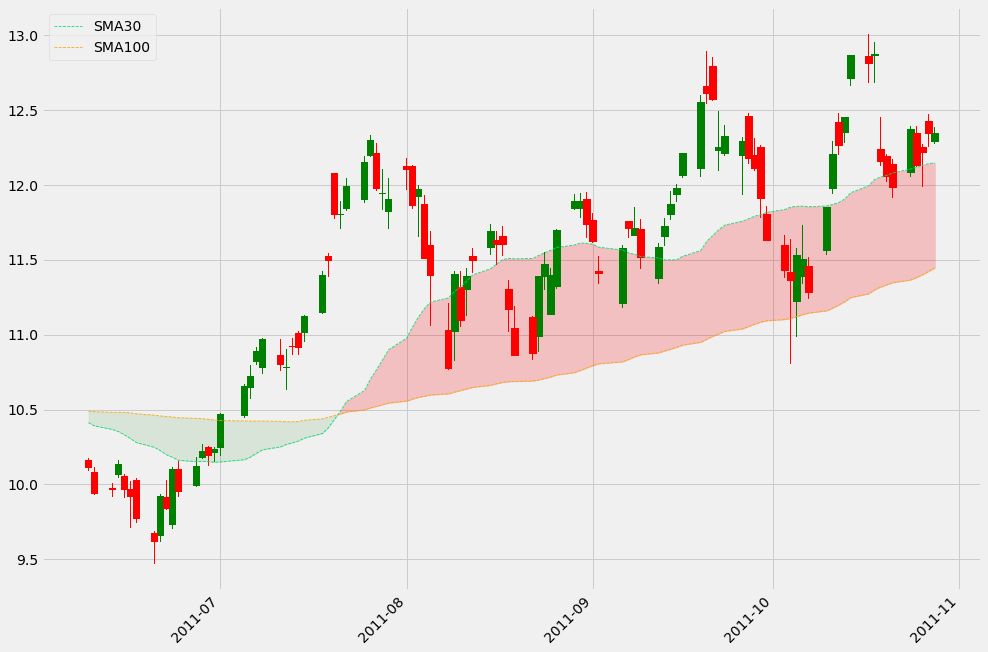

In [9]:
df1=df[-100:]
date=np.array(df1.index)
SMA30=np.array(df1['SMA30'])
SMA100=np.array(df1['SMA100'])
plt.figure(figsize=(15,10))

width = 1.3
width2 = 0.2

#define up and down prices
up = df1[df1.Close>=df1.Open]
down = df1[df1.Close<df1.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Close,width2,bottom=down.Close,color=col2)
plt.bar(down.index,down.Low-down.Open,width2,bottom=down.Open,color=col2)

#rotate x-axis tick labels
plt.plot(date,
         SMA30,
         color='#04DE71',
         linestyle='--',
         label='SMA30',
         linewidth=0.8
            )
plt.plot(date,
         SMA100,
         color='Orange',
         linestyle='--',
         label='SMA100',
         linewidth=0.8

            )
plt.fill_between(date,
                 SMA30,
                 SMA100,
                where=(SMA100>SMA30),
                alpha=0.1,
                color='green',
                interpolate=True)
plt.fill_between(date,
                 SMA30,
                 SMA100,
                where=(SMA100<SMA30),
                alpha=0.2,
                color='red',
                interpolate=True)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()